In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [271]:
data = pd.read_csv('BINANCE_BTCUSDT, 1D.csv', date_parser = True)
data.tail()

,time,open,high,low,close
1556,2021-11-20T00:00:00Z,58057.10,59845.00,57353.00,59707.51
1557,2021-11-21T00:00:00Z,59707.52,60029.76,58486.65,58622.02
1558,2021-11-22T00:00:00Z,58617.70,59444.00,55610.00,56247.18
1559,2021-11-23T00:00:00Z,56243.83,58009.99,55317.00,57541.27
1560,2021-11-24T00:00:00Z,57541.26,57735.00,55837.00,56750.11


In [296]:
data_training = data[data['time']< '2021-08-01'].copy()
data_training

,time,open,high,low,close
0,2017-08-17T00:00:00Z,4261.48,4485.39,4200.74,4285.08
1,2017-08-18T00:00:00Z,4285.08,4371.52,3938.77,4108.37
2,2017-08-19T00:00:00Z,4108.37,4184.69,3850.00,4139.98
3,2017-08-20T00:00:00Z,4120.98,4211.08,4032.62,4086.29
4,2017-08-21T00:00:00Z,4069.13,4119.62,3911.79,4016.00
...,...,...,...,...,...
1440,2021-07-27T00:00:00Z,37241.33,39542.61,36383.00,39457.87
1441,2021-07-28T00:00:00Z,39456.61,40900.00,38772.00,40019.56
1442,2021-07-29T00:00:00Z,40019.57,40640.00,39200.00,40016.48
1443,2021-07-30T00:00:00Z,40018.49,42316.71,38313.23,42206.37


In [297]:
data_test = data[data['time']> '2021-08-01'].copy()
data_test

,time,open,high,low,close
1445,2021-08-01T00:00:00Z,41461.84,42599.00,39422.01,39845.44
1446,2021-08-02T00:00:00Z,39850.27,40480.01,38690.00,39147.82
1447,2021-08-03T00:00:00Z,39146.86,39780.00,37642.03,38207.05
1448,2021-08-04T00:00:00Z,38207.04,39969.66,37508.56,39723.18
1449,2021-08-05T00:00:00Z,39723.17,41350.00,37332.70,40862.46
...,...,...,...,...,...
1556,2021-11-20T00:00:00Z,58057.10,59845.00,57353.00,59707.51
1557,2021-11-21T00:00:00Z,59707.52,60029.76,58486.65,58622.02
1558,2021-11-22T00:00:00Z,58617.70,59444.00,55610.00,56247.18
1559,2021-11-23T00:00:00Z,56243.83,58009.99,55317.00,57541.27


In [298]:
 training_data = data_training.drop(['time'], axis = 1)
 training_data.head()

,open,high,low,close
0,4261.48,4485.39,4200.74,4285.08
1,4285.08,4371.52,3938.77,4108.37
2,4108.37,4184.69,3850.00,4139.98
3,4120.98,4211.08,4032.62,4086.29
4,4069.13,4119.62,3911.79,4016.00


In [299]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.01777651, 0.01963201, 0.0233728 , 0.0181509 ],
       [0.01816732, 0.01778279, 0.01894786, 0.01522456],
       [0.01524103, 0.01474873, 0.01744844, 0.01574803],
       ...,
       [0.60992532, 0.60677195, 0.61454656, 0.60986772],
       [0.60990743, 0.63400122, 0.5995681 , 0.6461326 ],
       [0.64613824, 0.63613333, 0.64495296, 0.63380291]])

In [300]:
len(training_data)

1445

In [301]:
X_train = [] 
Y_train = []
for i in range(60, training_data.shape[0]):
    
    X_train.append(training_data[i-60:i])
    Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

    

In [302]:
training_data[60]

array([0.04176379, 0.04080078, 0.0467576 , 0.04257611])

In [303]:
Y_train.shape

(1385,)

In [304]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [305]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 4)))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units =1))
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 60, 50)            11000     
                                                                 
 dropout_28 (Dropout)        (None, 60, 50)            0         
                                                                 
 lstm_29 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_29 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_30 (LSTM)              (None, 60, 80)            45120     
                                                                 
 dropout_30 (Dropout)        (None, 60, 80)            0         
                                                                 
 lstm_31 (LSTM)              (None, 120)              

In [306]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history= model.fit(X_train, Y_train, epochs = 50, batch_size =50, validation_split=0.1)


Epoch 1/50
25/25 [==============================] - 11s 269ms/step - loss: 0.0160 - val_loss: 0.0291
Epoch 2/50
25/25 [==============================] - 6s 245ms/step - loss: 0.0054 - val_loss: 0.0225
Epoch 3/50
25/25 [==============================] - 8s 324ms/step - loss: 0.0032 - val_loss: 0.0496
Epoch 4/50
25/25 [==============================] - 8s 324ms/step - loss: 0.0030 - val_loss: 0.0504
Epoch 5/50
25/25 [==============================] - 7s 285ms/step - loss: 0.0029 - val_loss: 0.0259
Epoch 6/50
25/25 [==============================] - 8s 324ms/step - loss: 0.0023 - val_loss: 0.0124
Epoch 7/50
25/25 [==============================] - 7s 281ms/step - loss: 0.0026 - val_loss: 0.0086
Epoch 8/50
25/25 [==============================] - 7s 300ms/step - loss: 0.0020 - val_loss: 0.0141
Epoch 9/50
25/25 [==============================] - 6s 217ms/step - loss: 0.0024 - val_loss: 0.0084
Epoch 10/50
25/25 [==============================] - 7s 295ms/step - loss: 0.0026 - val_loss: 0.012

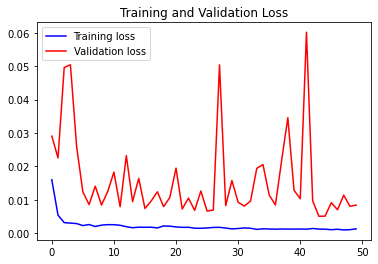

In [307]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [308]:
part_60_days = data_training.tail(60)
df= part_60_days.append(data_test, ignore_index = True)
df = df.drop(['time'], axis = 1)
df.head()

,open,high,low,close
0,36694.85,38225.00,35920.00,37568.68
1,37568.68,39476.00,37170.00,39246.79
2,39246.78,39289.07,35555.15,36829.00
3,36829.15,37925.00,34800.00,35513.20
4,35516.07,36480.00,35222.00,35796.31


In [309]:
len(df)

176

In [310]:
inputs = scaler.transform(df)

In [311]:
X_test = []
Y_test = []
for i in range (60, inputs.shape[0]):
        X_test.append(inputs[i-60:i])
        Y_test.append(inputs[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)



In [312]:
Y_pred = model.predict(X_test)

In [313]:
Y_train

array([0.04176379, 0.04259178, 0.03985941, ..., 0.60992532, 0.60990743,
       0.64613824])

In [314]:
scaler.scale_

array([1.65598556e-05, 1.62396979e-05, 1.68910359e-05, 1.65601353e-05])

In [315]:
scale = 1/scaler.scale_[0]

In [316]:
Y_test = Y_test*scale 
Y_pred = Y_pred*scale

In [317]:
Y_pred

array([[37310.21 ],
       [38360.742],
       [39124.355],
       [39499.07 ],
       [39497.145],
       [39218.72 ],
       [38838.934],
       [38541.008],
       [38430.656],
       [38553.99 ],
       [38905.76 ],
       [39437.57 ],
       [40046.09 ],
       [40687.156],
       [41328.258],
       [41923.258],
       [42430.375],
       [42794.746],
       [42979.383],
       [43020.785],
       [43039.844],
       [43130.96 ],
       [43339.32 ],
       [43682.258],
       [44106.676],
       [44551.965],
       [44943.727],
       [45256.934],
       [45503.605],
       [45698.496],
       [45825.668],
       [45874.48 ],
       [45876.973],
       [45899.02 ],
       [45995.723],
       [46190.88 ],
       [46505.715],
       [46953.03 ],
       [47396.855],
       [47672.8  ],
       [47714.082],
       [47503.2  ],
       [47086.477],
       [46554.484],
       [45988.4  ],
       [45491.434],
       [45172.1  ],
       [45095.24 ],
       [45264.285],
       [45649.918],


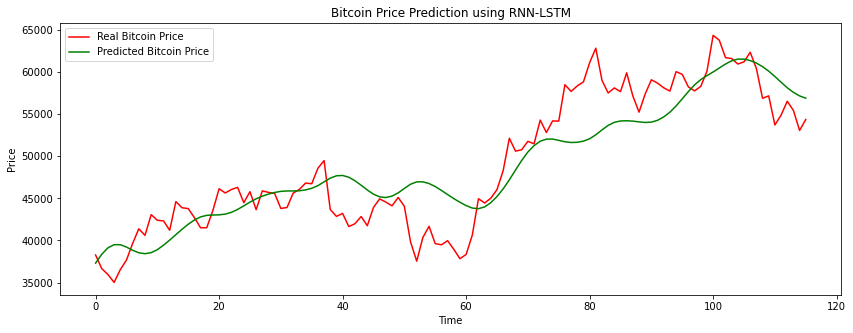

In [318]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Bitcoin Price')
plt.plot(Y_pred, color = 'green', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN-LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [319]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [320]:
mean_absolute_percentage_error(Y_pred,Y_test)

0.06035066584836966